By 

### Bernardo Vimpi

May 2020

### LOGISTIC REGRESSION 

#### Project Objective and Scope

Compared to the previous SAT vs GPA predictive analysis, in this project I will be analyzing the SAT in relation to Admission cretiria. Here the focus will be to predict if a student will be admitted or not. In doing so, I will use LOGISTIC REGRESSION for further analysis of the data and draw conclusions based on the results. 

#### import libraries

In [133]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [134]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


Like dummies we need to convert the "Yes" and "Nos" to numerical data for quantitative analysis.

In [135]:
data= raw_data.copy()
data['Admitted'] =data['Admitted'].map({'Yes':1, 'No' :0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### DATA VISUALIZATION

#### Define Variables

In [136]:
y= data['Admitted']
x1= data['SAT']

#### SCATTER PLOT

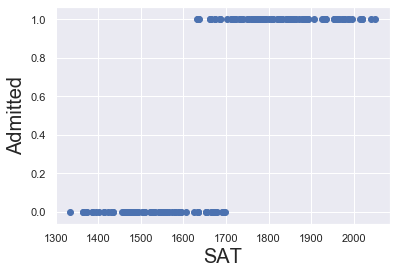

In [137]:
plt.scatter(x1, y, color = 'C0')
plt.xlabel('SAT', fontsize =20)
plt.ylabel('Admitted', fontsize =20)
plt.show()

As you can see, this is a strange scatterplot. This is what happens when we deal with categorical outcomes. Nonetheless, if we focus on this scatterplot, we'll notice that for all observations below 1700, the outcome was 0, or they didn't get admitted and vice versa.

##### PLOT WITH A REGRESSION LINE

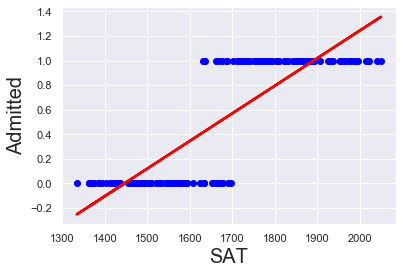

In [138]:
x= sm.add_constant(x1)
reg_lin=sm.OLS(y,x)
results_lin=reg_lin.fit()

plt.scatter(x1,y,color = 'blue')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='red')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted',fontsize =20)
plt.show()


This linear regression seems to have no great value and it also predicts the values that fall outside of the dataset domain. The regression doesn't even know that our values are bounded between 0 and 1. It seems counter intuitive, right? Not really! Linear regression is a great technique but is simply not fit for this type of analysis. This violates the first assumption of OLS which is LINEARITY. Since the data is non-linear, we must also use non-linear approaches.

### LOGISTIC REGRESSION CURVE AND METHOD

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


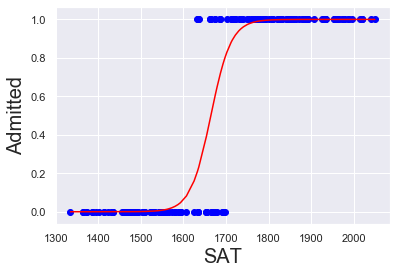

In [139]:
reg_log=sm.Logit(y,x)
results_log =reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) /(1 +np.exp(b0+x*b1)))

f_sorted =np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted=np.sort(np.array(x1))


plt.scatter(x1,y,color = 'blue')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted',fontsize =20)
plt.plot(x_sorted, f_sorted, color ='red')
plt.show()

This regression is bounded by the two outcomes: 0 and 1. This function shows the probability of an admission given an SAT score. To expand on that, when the SAT is really low, the probability of getting admitted is 0. When SAT score is high, the probability of getting admitted is 1 or 100%. A probability of scoring between 1550 and 1750 is uncertain. For example, if a student scores 1650, the same student has about 50% chances of getting admitted.

### LOGISTIC REGRESSION

x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log =reg_log.fit()
 results_log.describe() # here, due to the updates in the libraries, it will error. If you google the error, there is workaround which I present below

In [140]:
#Workaround to fix the issue of describing the data using the describe method

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

In [141]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
results_log =reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 May 2020   Pseudo R-squ.:                  0.7992
Time:                        16:28:16   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

RESULTS: 
The LLR, which measures if our mode is statistically different from LL-null, also knonw as uelsee model, p-value is very low which means our mode is very significant. The Pseudo R-Squared is around 0.7992. The McFadden's R-Squared states that a 'A good Pseudo R-Squared is somewhere between 0.2 and 0.4. This measure is mostly useful for comparing variations of the same model. Different models will have completely different and incomparable Pseudo R-squares'.

#### USING BINARY PREDICTORS

#### Load the Data

In [142]:
raw_data= pd.read_csv('2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [143]:
data=raw_data.copy()
data['Admitted'] =data['Admitted'].map({'Yes': 1, 'No' : 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


#### DEPENDENT vs INDEPENDENT VARIABLES

In [144]:
y = data['Admitted']
x1 = data['Gender']

#### REGRESSION

In [145]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log =reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 May 2020   Pseudo R-squ.:                  0.1659
Time:                        16:28:16   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

The model is siginficant (using the LLR-p-value) and the gender variable is significant as well. The interpretantion is as follow: log(odds) = -0.64 + 2.08 * Gender.

In [146]:
np.exp(2.0786)

7.993270498536442

The odds of a female to getting admitted as 7.99 of compared to male.

In [147]:
y = data['Admitted']
x1 = data[['SAT', 'Gender']]


### Regression 

In [148]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log =reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 May 2020   Pseudo R-squ.:                  0.8249
Time:                        16:28:16   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We now get a regression with a much higher log_likelihood, which means is a better one. It makes sense since SAT is an outstanding predictor. We can also see that the Gender variable is significant but this time we have 0.002, instead of 0.000 as previously. The new coeficient of gender is 1.94 and the exponetial of 1.944 is around 7( 6.99)

In [149]:
np.exp(1.9449)

6.992932526814459

Given the same SAT score, a female is 7 times more likely to be admitted than male. This implies that in this given university of degree of studies it is much easier for female to be admitted than male, all else equal. This is also a reflection of the real-world since many universities place quotas. However, some professions like Communication are predominantly female while STEM are predominantly male. Therefore, if a man applies for a degree in communications, his changes of getting in are 10 times higher than of a female and when a female applies for a STEM it will be much easier for her to get admitted, compared to males with the same SAT scores.

###### How accurate are our values? 

### Accuracy

In [150]:
np.set_printoptions(formatter ={'float' : lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

We can see that there are 0s 1s and some values in between.  As discussed earlier, those are probabilities.  Values above 0.5 were rounded up and those below 0.5 were rounded down.

##### ACTUAL VALUES

In [151]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

If 80% of the predicted values coincide with the actual values, we say the model has 80% accuracy. But we need to summarize this in a table. 

In [152]:
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [153]:
cm_df=pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df =cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


###### Calculating Accuracy

In [154]:
cm=np.array(cm_df)
accuracy_train =(cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

For 69 observations, the model predicted 0 when the true value was 0. For 91 observations, the model predicted 1 when the actual value was 1.  However, in 4 cases the model predicted 0 while the outcome was 1; in 5 cases it predicted 1 while it was 0. In 159 cases the model did its job. In 9 cases the model 'got confused'. Overall, the model made an accurate prediction 159 out of 168 cases. The accuracy is 94.6% ( which is calculated from 159/168). This can be illustrated by the below code as well

###  MODEL TESTING

In [155]:
test=pd.read_csv('2.03. Test dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


### Mapping the Categorical Variable

The goal here is to use our mode to make predictions based on the test data. The compared those with the actual outcome. Then calculate the accuracy and last create a confusion matrix.

In [156]:
test['Admitted'] =test['Admitted'].map({'Yes': 1, 'No' : 0})
test['Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [157]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


The oder of the variables (Constat, SAT, Gender) is very important

In [158]:
test_actual =test['Admitted']
test_data =test.drop(['Admitted'], axis=1)
test_data =sm.add_constant(test_data)
test_data


,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


##### CREATE THE CONFUSION MATRIX

In [159]:
def confusion_matrix (data, actual_values, model):
    
    pred_values = model.predict(data)
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1]) /cm.sum()
    return cm, accuracy

In [160]:
cm=confusion_matrix(test_data,test_actual,results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

The top two results, or the left side, is the confusion matrix while the right part is the accuracy. The accuracy of the model is 89.47% which is also the accuracy we had for the regression. Almost always, the training accuracy is higher than the test accuracy. That is because of the overfitting. The regression fitted the training data as well as possible. But that doesn't mean true for the predictions for all the values. Thats why we test the data the model has never seen and we make our conclusions based on that. Finally, lets format the confusion matrix, if anyone desires to proceed with additional analysis. 


In [161]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index ={0: 'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


Thank you

## Bernardo Vimpi

May 2020